# MUT Power Up Players and Their Eligible Teams
#### - Matt , last updated: Nov 2, 2018<br>

- Includes some non PU legends. Will make that more consistent in future.

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('mut_powerups.csv').drop('Unnamed: 0', axis=1)
df = pd.concat( [data, data['All Teams'].str.replace(',', '|').str.get_dummies()], axis=1)
numeric_data = df.select_dtypes(include=[float, int])
obj_data = df.select_dtypes(exclude=[float, int])
numeric_data['numTeams'] = numeric_data.sum(axis=1).astype(int)
players = pd.concat([obj_data, numeric_data], axis=1)
players['Position'] = players['Position'].str.replace('RB', 'HB').str.replace('Qb', 'QB')
players = players[ players['numTeams'] != 0]
players.to_csv('mut_powerups_nov2.csv')

In [17]:
players.shape

(206, 38)

In [57]:
players[ players['Type']=='Legend']

,Name,Position,Current Team,Type,All Teams,ARI,ATL,BAL,BUF,CAR,...,NYJ,OAK,PHI,PIT,SEA,SF,TB,TEN,WAS,numTeams
93,Steve Atwater,SS,-,Legend,",DEN",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102,La'Roi Glover,DT,-,Legend,",NO",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
193,Anthony Munoz,LT,-,Legend,CIN,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


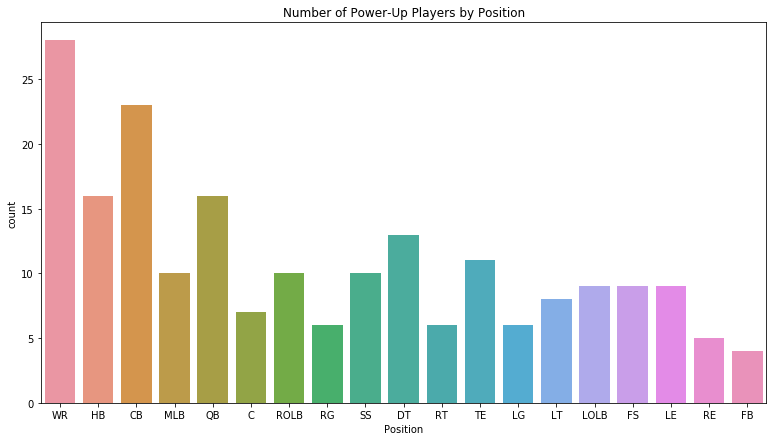

In [18]:
plt.figure(figsize=(13, 7))
sns.countplot(players['Position']);
plt.title('Number of Power-Up Players by Position');

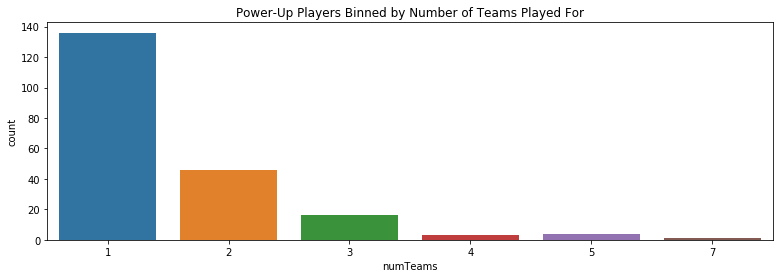

In [19]:
# Number of teams per power up player
plt.figure(figsize=(13, 4))
sns.countplot(players['numTeams']);
plt.title('Power-Up Players Binned by Number of Teams Played For');

In [20]:
numeric_data = players.select_dtypes(include=[float, int])

a = numeric_data.sum().sort_values(ascending=False)[1:]

pal = {'PHI':'xkcd:green', 'NE': 'darkblue', 'NO':'gold', 'GB':'green',
       'MIN':'xkcd:purple', 'WAS':'maroon', 'TEN': 'cyan', 'TB':'xkcd:crimson',
       'SEA':'chartreuse', 'LAC':'xkcd:azure', 'ATL':'xkcd:red',
       'BAL':'indigo', 'LAR':'xkcd:khaki', 'KC':'red', 'NYJ': 'darkgreen',
       'JAX':'xkcd:darkgreen', 'OAK':'grey', 'BUF':'xkcd:blue', 'CAR':'aqua',
       'CLE':'chocolate', 'PIT':'xkcd:yellow', 'NYG':'blue', 'SF':'xkcd:gold',
       'CHI':'xkcd:orange', 'DAL':'xkcd:darkblue', 'MIA':'xkcd:aqua',
       'DEN':'xkcd:orangered', 'HOU':'xkcd:navy', 'ARI':'xkcd:red',
       'CIN':'xkcd:orange', 'DET':'xkcd:lightblue', 'IND':'xkcd:azure'}

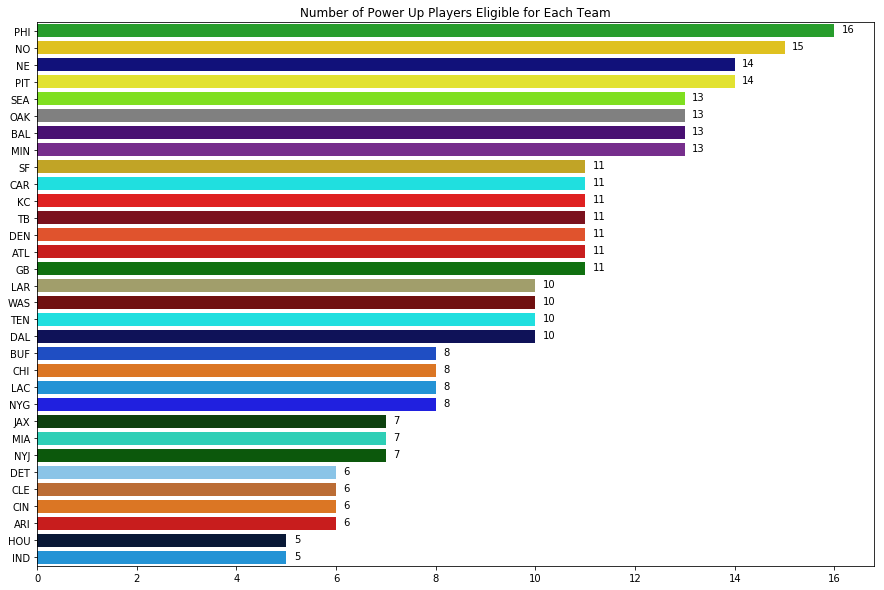

In [21]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=a.values, y=a.index, palette=pal)
for p in ax.patches:
    if np.isnan(p.get_width()):
        gh = 0.0
    else:
        gh = np.round(p.get_width(), 2)
                
    ax.annotate(int(gh), (np.round(gh+0.15, 3), p.get_y()+0.5))
ax.set_title('Number of Power Up Players Eligible for Each Team');

### Biggest journeymen

In [22]:
small = pd.concat([obj_data[['Name', 'Position', 'Type', 'All Teams']], players['numTeams']], axis=1)
small['All Teams'] = small['All Teams'].str.lstrip(',')
small[ small['numTeams'] >= 4].sort_values('numTeams', ascending=False)

,Name,Position,Type,All Teams,numTeams
105,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
100,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
117,Terell Owens,WR,HoF,"SF,PHI,DAL,BUF,CIN",5.0
149,Rashaan Melvin,CB,Power Up,"OAK,TB,BAL,NE,IND",5.0
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
98,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
114,Rod Woodson,CB,HoF,"PIT,SF,BAL,OAK",4.0


In [23]:
team_abbrevs = list(pal.keys())
team_list = []

players.reset_index(drop=True, inplace=True)
small.reset_index(drop=True, inplace=True)

for team in team_abbrevs:
    current_team = players[ players[team]==1]
    indices = current_team.index.values
    team_list.append(small.iloc[indices])

# Team Lists
**---------------------------------------------------------------**

![Image](http://content.sportslogos.net/logos/7/167/thumbs/960.gif)

##  Philadelphia Eagles 

In [24]:
i=0
team_list[i]

,Name,Position,Type,All Teams,numTeams
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
111,Donovan McNabb,QB,Legend PU,"PHI,MIN",2.0
112,Brian Dawkins,SS,Legend PU,"PHI,DEN",2.0
113,Reggie White,LE,Legend PU,"PHI,GB,CAR",3.0
117,Terell Owens,WR,HoF,"SF,PHI,DAL,BUF,CIN",5.0
150,Fletcher Cox,DT,Power Up,PHI,1.0
151,Zach Ertz,TE,Power Up,PHI,1.0
152,Brandon Graham,LE,Power Up,PHI,1.0
153,Jordan Hicks,MLB,Power Up,PHI,1.0
154,Lane Johnson,RT,Power Up,PHI,1.0


![Image](http://content.sportslogos.net/logos/7/151/thumbs/y71myf8mlwlk8lbgagh3fd5e0.gif)

## New England Patriots

In [25]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
49,Jabaal Sheard,RE,Power Up,"IND,CLE,NE",3.0
100,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
123,David Andrews,C,Power Up,NE,1.0
124,Tom Brady,QB,Power Up,NE,1.0
125,James Develin,FB,Power Up,NE,1.0
126,Julian Edelman,WR,Power Up,NE,1.0
127,Rob Gronkowski,TE,Power Up,NE,1.0
128,Devin McCourty,FS,Power Up,NE,1.0
129,Dont'a Hightower,LOLB,Power Up,NE,1.0
130,Stephon Gilmore,CB,Power Up,"NE,BUF",2.0


![Image](http://content.sportslogos.net/logos/7/175/thumbs/907.gif)

## New Orleans Saints

In [26]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
42,Jimmy Graham,TE,Power Up,"GB,NO,SEA",3.0
102,La'Roi Glover,DT,Legend,NO,1.0
103,Willie Roaf,LT,Legend PU,"NO,KC",2.0
104,Ricky Williams,HB,Master,"NO,MIA,BAL",3.0
105,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
131,Cameron Jordan,LE,Power Up,NO,1.0
132,Alvin Kamara,HB,Power Up,NO,1.0
133,Marson Lattimore,CB,Power Up,NO,1.0
134,Ryan Ramczyk,RT,Power Up,NO,1.0
135,Michael Thomas,WR,Power Up,NO,1.0


![Image](http://content.sportslogos.net/logos/7/171/thumbs/dcy03myfhffbki5d7il3.gif)

## Green Bay Packers

In [27]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
12,Micah Hyde,SS,Power Up,"BUF,GB",2.0
37,Davante Adams,WR,Power Up,GB,1.0
38,David Bakhtiari,LT,Power Up,GB,1.0
39,Kenny Clark,DT,Power Up,GB,1.0
40,Aaron Rodgers,QB,Power Up,GB,1.0
41,Ha Ha Clinton-Dix,FS,Power Up,GB,1.0
42,Jimmy Graham,TE,Power Up,"GB,NO,SEA",3.0
68,Casey Hayward,CB,Power Up,"LAC,GB",2.0
75,Josh Sitton,LG,Power Up,"MIA,GB,CHI",3.0
96,Ted Hendricks,LOLB,Legend PU,"IND,GB,OAK",3.0


![Image](http://content.sportslogos.net/logos/7/172/thumbs/17227042013.gif)

## Minnesota Vikings

In [28]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
76,Anthony Barr,ROLB,Power Up,MIN,1.0
77,Stefon Diggs,WR,Power Up,MIN,1.0
78,Everson Griffen,RE,Power Up,MIN,1.0
79,Xavier Rhodes,CB,Power Up,MIN,1.0
80,Harrison Smith,FS,Power Up,MIN,1.0
81,Adam Thielen,WR,Power Up,MIN,1.0
82,Linval Joseph,DT,Power Up,"MIN,NYG",2.0
100,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
101,John Randle,DT,Legend PU,"MIN,SEA",2.0
111,Donovan McNabb,QB,Legend PU,"PHI,MIN",2.0


![Image](http://content.sportslogos.net/logos/7/168/thumbs/im5xz2q9bjbg44xep08bf5czq.gif)

## Washington Redskins

In [29]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
88,Bruce Smith,RE,Legend PU,"BUF,WAS",2.0
121,Sean Taylor,FS,Legend PU,WAS,1.0
122,Champ Bailey,CB,Legend PU,"WAS,DEN",2.0
183,Ryan Kerrigan,LOLB,Power Up,WAS,1.0
184,Jordan Reed,TE,Power Up,WAS,1.0
185,Brandon Scherff,RG,Power Up,WAS,1.0
186,Trent Williams,LT,Power Up,WAS,1.0
187,Zach Brown,MLB,Power Up,"WAS,TEN,BUF",3.0
191,Paul Krause,FS,Legend PU,"WAS,MIN",2.0


![Image](http://content.sportslogos.net/logos/7/160/thumbs/1053.gif)

## Tennessee Titans

In [30]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
100,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
105,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
115,Steve Hutchinson,LG,Legend PU,"SEA,MIN,TEN",3.0
120,Eddie George,HB,Legend PU,TEN,1.0
178,Kevin Byard,FS,Power Up,TEN,1.0
179,Jurell Casey,RE,Power Up,TEN,1.0
180,Taylor Lewan,LT,Power Up,TEN,1.0
181,Malcolm Butler,CB,Power Up,"TEN,NE",2.0
182,Delanie Walker,TE,Power Up,"TEN,SF",2.0
187,Zach Brown,MLB,Power Up,"WAS,TEN,BUF",3.0


![Image](http://content.sportslogos.net/logos/7/176/thumbs/17636702014.gif)

## Tampa Bay Buccaneers

In [31]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
105,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
110,Tim Brown,WR,Legend PU,"OAK,TB",2.0
118,Derrick Brooks,ROLB,Legend PU,TB,1.0
119,Steve Young,QB,Legend PU,"TB,SF",2.0
149,Rashaan Melvin,CB,Power Up,"OAK,TB,BAL,NE,IND",5.0
173,Lavonte David,ROLB,Power Up,TB,1.0
174,Demar Dotson,RT,Power Up,TB,1.0
175,Mike Evans,WR,Power Up,TB,1.0
176,Gerald McCoy,DT,Power Up,TB,1.0
177,Brent Grimes,CB,Power Up,"TB,ATL,MIA",3.0


![Image](http://content.sportslogos.net/logos/7/180/thumbs/pfiobtreaq7j0pzvadktsc6jv.gif)

## Seattle Seahawks

In [32]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
36,Golden Tate III,WR,Power Up,"DET,SEA",2.0
42,Jimmy Graham,TE,Power Up,"GB,NO,SEA",3.0
101,John Randle,DT,Legend PU,"MIN,SEA",2.0
115,Steve Hutchinson,LG,Legend PU,"SEA,MIN,TEN",3.0
116,Jerry Rice,WR,Captain,"SF,OAK,SEA",3.0
166,Doug Baldwin,WR,Power Up,SEA,1.0
167,Kam Chancellor,SS,Power Up,SEA,1.0
168,Earl Thomas III,FS,Power Up,SEA,1.0
169,Bobby Wagner,MLB,Power Up,SEA,1.0
170,Russell Wilson,QB,Power Up,SEA,1.0


![Image](http://content.sportslogos.net/logos/7/6446/thumbs/644624152017.gif)

## Los Angeles Chargers

In [33]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
63,Keenan Allan,WR,Power Up,LAC,1.0
64,Joey Bosa,LE,Power Up,LAC,1.0
65,Melvin Gordon,HB,Power Up,LAC,1.0
66,Hunter Henry,TE,Power Up,LAC,1.0
67,Melvin Ingram,RE,Power Up,LAC,1.0
68,Casey Hayward,CB,Power Up,"LAC,GB",2.0
105,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
136,Drew Brees,QB,Power Up,"NO,LAC",2.0


![Image](http://content.sportslogos.net/logos/7/173/thumbs/299.gif)

## Atlanta Falcons

In [34]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
3,Devonta Freeman,HB,Power Up,ATL,1.0
4,Deion Jones,MLB,Power Up,ATL,1.0
5,Julio Jones,WR,Power Up,ATL,1.0
6,Matt Ryan,QB,Power Up,ATL,1.0
7,Desmond Trufant,CB,Power Up,ATL,1.0
8,Alex Mack,C,Power Up,"ATL,CLE",2.0
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
97,Tony Gonzalez,TE,Legend PU,"KC,ATL",2.0
177,Brent Grimes,CB,Power Up,"TB,ATL,MIA",3.0


![Image](http://content.sportslogos.net/logos/7/153/thumbs/318.gif)

## Baltimore Ravens

In [35]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
9,Jimmy Smith,CB,Power Up,BAL,1.0
10,Terrell Suggs,ROLB,Power Up,BAL,1.0
11,Marshal Yanda,RG,Power Up,BAL,1.0
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
86,Ray Lewis,MLB,Captain,BAL,1.0
87,Jonathan Ogden,LT,Legend PU,BAL,1.0
94,Shannon Sharpe,TE,Captain,"DEN,BAL",2.0
104,Ricky Williams,HB,Master,"NO,MIA,BAL",3.0
105,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
114,Rod Woodson,CB,HoF,"PIT,SF,BAL,OAK",4.0


![Image](http://content.sportslogos.net/logos/7/5941/thumbs/594179532017.gif)

## Los Angeles Rams

In [36]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
69,Aaron Donald,DT,Power Up,LAR,1.0
70,Todd Gurley II,HB,Power Up,LAR,1.0
71,Lamarcus Joyner,FS,Power Up,LAR,1.0
72,Ndamukong Suh,DT,Power Up,"LAR,DET,MIA",3.0
73,Marcus Peters,CB,Power Up,"LAR,KC",2.0
83,Aeneas Williams,CB,Legend PU,"ARI,LAR",2.0
98,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
140,Janoris Jenkins,CB,Power Up,"NYG,LAR",2.0
143,Trumaine Johnson,CB,Power Up,"NYJ,LAR",2.0
203,Brandin Cooks,WR,Power Up,"NO,NE,LAR",3.0


![Image](http://content.sportslogos.net/logos/7/162/thumbs/857.gif)

## Kansas City Chiefs

In [37]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
57,Eric Berry,SS,Power Up,KC,1.0
58,Tyreek Hill,WR,Power Up,KC,1.0
59,Justin Houston,LOLB,Power Up,KC,1.0
60,Kareen Hunt,HB,Power Up,KC,1.0
61,Travis Kelce,TE,Power Up,KC,1.0
62,Patrick Mahomes,QB,Power Up,KC,1.0
73,Marcus Peters,CB,Power Up,"LAR,KC",2.0
97,Tony Gonzalez,TE,Legend PU,"KC,ATL",2.0
103,Willie Roaf,LT,Legend PU,"NO,KC",2.0
148,Rodney Hudson,C,Power Up,"OAK,KC",2.0


![Image](http://content.sportslogos.net/logos/7/152/thumbs/v7tehkwthrwefgounvi7znf5k.gif)

## Boo York Jets

In [38]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
105,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
108,Kevin Mawae,C,Legend Ltd,NYJ,1.0
137,Demario Davis,MLB,Power Up,"NO,NYJ,CLE",3.0
141,Damon Harrison Sr,DT,Power Up,"NYG,NYJ",2.0
142,Jamal Adams,SS,Power Up,NYJ,1.0
143,Trumaine Johnson,CB,Power Up,"NYJ,LAR",2.0


![Image](http://content.sportslogos.net/logos/7/159/thumbs/15988562013.gif)

## Jacksonville Jaguars

In [39]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
50,Leonard Fournette,HB,Power Up,JAX,1.0
51,Myles Jack,LOLB,Power Up,JAX,1.0
52,Jalen Ramsey,CB,Power Up,JAX,1.0
53,Telvin Smith,ROLB,Power Up,JAX,1.0
54,Calais Campbell,LE,Power Up,"JAX,ARI",2.0
55,Andrew Norwell,LG,Power Up,"JAX,CAR",2.0
56,AJ Bouye,CB,Power Up,"JAX,HOU",2.0


![Image](http://content.sportslogos.net/logos/7/163/thumbs/g9mgk6x3ge26t44cccm9oq1vl.gif)

In [40]:
i+=1
print(team_abbrevs[i])
team_list[i]

OAK


,Name,Position,Type,All Teams,numTeams
96,Ted Hendricks,LOLB,Legend PU,"IND,GB,OAK",3.0
100,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
109,Howie Long,RT,Legend Ltd,OAK,1.0
110,Tim Brown,WR,Legend PU,"OAK,TB",2.0
114,Rod Woodson,CB,HoF,"PIT,SF,BAL,OAK",4.0
116,Jerry Rice,WR,Captain,"SF,OAK,SEA",3.0
144,Amari Cooper,WR,Power Up,OAK,1.0
145,Khalil Mack,LE,Power Up,"CHI,OAK",2.0
146,Derek Carr,QB,Power Up,OAK,1.0
147,Kelechi Osemele,LG,Power Up,"OAK,BAL",2.0


![Image](http://content.sportslogos.net/logos/7/149/thumbs/n0fd1z6xmhigb0eej3323ebwq.gif)

In [41]:
i+=1
print(team_abbrevs[i])
team_list[i]

BUF


,Name,Position,Type,All Teams,numTeams
12,Micah Hyde,SS,Power Up,"BUF,GB",2.0
88,Bruce Smith,RE,Legend PU,"BUF,WAS",2.0
117,Terell Owens,WR,HoF,"SF,PHI,DAL,BUF,CIN",5.0
130,Stephon Gilmore,CB,Power Up,"NE,BUF",2.0
157,Nigel Bradham,LOLB,Power Up,"PHI,BUF",2.0
158,Jason Peters,LT,Power Up,"PHI,BUF",2.0
187,Zach Brown,MLB,Power Up,"WAS,TEN,BUF",3.0
198,Marshawn Lynch,RB,Power Up,"OAK,BUF,SEA",3.0


![Image](http://content.sportslogos.net/logos/7/174/thumbs/f1wggq2k8ql88fe33jzhw641u.gif)

In [42]:
i+=1
print(team_abbrevs[i])
team_list[i]

CAR


,Name,Position,Type,All Teams,numTeams
13,Luke Kuechly,MLB,Power Up,CAR,1.0
14,Cam Newton,Qb,Power Up,CAR,1.0
15,Kawann Short,DT,Power Up,CAR,1.0
16,Daryl Williams,RT,Power Up,CAR,1.0
17,Greg Olsen,TE,Power Up,"CAR,CHI",2.0
55,Andrew Norwell,LG,Power Up,"JAX,CAR",2.0
98,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
113,Reggie White,LE,Legend PU,"PHI,GB,CAR",3.0
197,Jeremy Shockey,TE,Legend PU,"NYG,NO,CAR",3.0
200,Dontari Poe,DT,Power Up,"KC,ATL,CAR",3.0


![Image](http://content.sportslogos.net/logos/7/155/thumbs/15578552015.gif)

In [43]:
i+=1
print(team_abbrevs[i])
team_list[i]

CLE


,Name,Position,Type,All Teams,numTeams
8,Alex Mack,C,Power Up,"ATL,CLE",2.0
23,Joel Bitonio,LG,Power Up,CLE,1.0
24,Kevin Zeitler,RG,Power Up,"CLE,CIN",2.0
25,Jarvis Landry,WR,Power Up,"CLE,MIA",2.0
49,Jabaal Sheard,RE,Power Up,"IND,CLE,NE",3.0
137,Demario Davis,MLB,Power Up,"NO,NYJ,CLE",3.0


![Image](http://content.sportslogos.net/logos/7/156/thumbs/970.gif)

In [44]:
i+=1
print(team_abbrevs[i])
team_list[i]

PIT


,Name,Position,Type,All Teams,numTeams
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
98,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
114,Rod Woodson,CB,HoF,"PIT,SF,BAL,OAK",4.0
160,Ryan Shazier,MLB,Master,PIT,1.0
161,Le'Veon Bell,HB,Power Up,PIT,1.0
162,Antonio Brown,WR,Power Up,PIT,1.0
163,David DeCastro,RG,Power Up,PIT,1.0
164,Marcus Gilbert,RT,Power Up,PIT,1.0
165,Ben Roethlisberger,QB,Power Up,PIT,1.0
190,Dermontti Dawson,C,Legend PU,PIT,1.0


![Image](http://content.sportslogos.net/logos/7/166/thumbs/919.gif)

In [45]:
i+=1
print(team_abbrevs[i])
team_list[i]

NYG


,Name,Position,Type,All Teams,numTeams
82,Linval Joseph,DT,Power Up,"MIN,NYG",2.0
106,Michael Strahan,LE,Captain,NYG,1.0
107,Lawrence Taylor,ROLB,Legend PU,NYG,1.0
138,Odell Beckham Jr,WR,Power Up,NYG,1.0
139,Landon Collins,SS,Power Up,NYG,1.0
140,Janoris Jenkins,CB,Power Up,"NYG,LAR",2.0
141,Damon Harrison Sr,DT,Power Up,"NYG,NYJ",2.0
197,Jeremy Shockey,TE,Legend PU,"NYG,NO,CAR",3.0


![Image](http://content.sportslogos.net/logos/7/179/thumbs/17994552009.gif)

In [46]:
i+=1
print(team_abbrevs[i])
team_list[i]

SF


,Name,Position,Type,All Teams,numTeams
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
91,Larry Allen,RG,Legend PU,"DAL,SF",2.0
98,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
100,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
114,Rod Woodson,CB,HoF,"PIT,SF,BAL,OAK",4.0
116,Jerry Rice,WR,Captain,"SF,OAK,SEA",3.0
117,Terell Owens,WR,HoF,"SF,PHI,DAL,BUF,CIN",5.0
119,Steve Young,QB,Legend PU,"TB,SF",2.0
171,Kyle Juszczyk,FB,Power Up,"SF,BAL",2.0
172,Richard Sherman,CB,Power Up,"SF,SEA",2.0


![Image](http://content.sportslogos.net/logos/7/169/thumbs/364.gif)

In [47]:
i+=1
print(team_abbrevs[i])
team_list[i]

CHI


,Name,Position,Type,All Teams,numTeams
17,Greg Olsen,TE,Power Up,"CAR,CHI",2.0
18,Adrian Amos,SS,Power Up,CHI,1.0
19,Jordan Howard,HB,Power Up,CHI,1.0
20,Danny Trevathan,MLB,Power Up,"CHI,DEN",2.0
75,Josh Sitton,LG,Power Up,"MIA,GB,CHI",3.0
89,Brian Urlacher,MLB,HoF,CHI,1.0
145,Khalil Mack,LE,Power Up,"CHI,OAK",2.0
205,Alshon Jeffery,WR,Power Up,"CHI,PHI",2.0


![Image](http://content.sportslogos.net/logos/7/165/thumbs/406.gif)

In [48]:
i+=1
print(team_abbrevs[i])
team_list[i]

DAL


,Name,Position,Type,All Teams,numTeams
26,Ezekiel Elliot,HB,Power Up,DAL,1.0
27,Travis Frederick,C,Power Up,DAL,1.0
28,Sean Lee,ROLB,Power Up,DAL,1.0
29,Zack Martin,RG,Power Up,DAL,1.0
30,Tyron Smith,LT,Power Up,DAL,1.0
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
90,DeMarcus Ware,LOLB,Legend PU,"DAL,DEN",2.0
91,Larry Allen,RG,Legend PU,"DAL,SF",2.0
117,Terell Owens,WR,HoF,"SF,PHI,DAL,BUF,CIN",5.0
199,Demarcus Lawrence,LE,Power Up,DAL,1.0


![Image](http://content.sportslogos.net/logos/7/150/thumbs/15073062018.gif)

In [49]:
i+=1
print(team_abbrevs[i])
team_list[i]

MIA


,Name,Position,Type,All Teams,numTeams
25,Jarvis Landry,WR,Power Up,"CLE,MIA",2.0
72,Ndamukong Suh,DT,Power Up,"LAR,DET,MIA",3.0
74,Reshad Jones,SS,Power Up,MIA,1.0
75,Josh Sitton,LG,Power Up,"MIA,GB,CHI",3.0
99,Dan Marino,QB,HoF,MIA,1.0
104,Ricky Williams,HB,Master,"NO,MIA,BAL",3.0
177,Brent Grimes,CB,Power Up,"TB,ATL,MIA",3.0


![Image](http://content.sportslogos.net/logos/7/161/thumbs/9ebzja2zfeigaziee8y605aqp.gif)

In [50]:
i+=1
print(team_abbrevs[i])
team_list[i]

DEN


,Name,Position,Type,All Teams,numTeams
20,Danny Trevathan,MLB,Power Up,"CHI,DEN",2.0
31,Chris Harris Jr,CB,Power Up,DEN,1.0
32,Von Miller,LOLB,Power Up,DEN,1.0
33,Demaryius Thomas,WR,Power Up,DEN,1.0
90,DeMarcus Ware,LOLB,Legend PU,"DAL,DEN",2.0
92,Terrell Davis,HB,HoF,DEN,1.0
93,Steve Atwater,SS,Legend,DEN,1.0
94,Shannon Sharpe,TE,Captain,"DEN,BAL",2.0
112,Brian Dawkins,SS,Legend PU,"PHI,DEN",2.0
122,Champ Bailey,CB,Legend PU,"WAS,DEN",2.0


![Image](http://content.sportslogos.net/logos/7/157/thumbs/570.gif)

In [51]:
i+=1
print(team_abbrevs[i])
team_list[i]

HOU


,Name,Position,Type,All Teams,numTeams
43,Jadeveon Clowney,ROLB,Power Up,HOU,1.0
44,DeAndre Hopkins,WR,Power Up,HOU,1.0
45,JJ Watt,LE,Power Up,HOU,1.0
46,Tyrann Mathieu,FS,Power Up,"HOU,ARI",2.0
56,AJ Bouye,CB,Power Up,"JAX,HOU",2.0


![Image](http://content.sportslogos.net/logos/7/177/thumbs/kwth8f1cfa2sch5xhjjfaof90.gif)

In [52]:
i+=1
print(team_abbrevs[i])
team_list[i]

ARI


,Name,Position,Type,All Teams,numTeams
0,Larry Fitzgerald,WR,Power Up,ARI,1.0
1,David Johnson,HB,Power Up,ARI,1.0
2,Patrick Peterson,CB,Power Up,ARI,1.0
46,Tyrann Mathieu,FS,Power Up,"HOU,ARI",2.0
54,Calais Campbell,LE,Power Up,"JAX,ARI",2.0
83,Aeneas Williams,CB,Legend PU,"ARI,LAR",2.0


![Image](http://content.sportslogos.net/logos/7/154/thumbs/403.gif)

In [53]:
i+=1
print(team_abbrevs[i])
team_list[i]

CIN


,Name,Position,Type,All Teams,numTeams
21,Geno Atkins,DT,Power Up,CIN,1.0
22,AJ Green,WR,Power Up,CIN,1.0
24,Kevin Zeitler,RG,Power Up,"CLE,CIN",2.0
105,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
117,Terell Owens,WR,HoF,"SF,PHI,DAL,BUF,CIN",5.0
193,Anthony Munoz,LT,Legend,CIN,1.0


![Image](http://content.sportslogos.net/logos/7/170/thumbs/17013982017.gif)

In [54]:
i+=1
print(team_abbrevs[i])
team_list[i]

DET


,Name,Position,Type,All Teams,numTeams
34,Darius Slay Jr,CB,Power Up,DET,1.0
35,Matthew Stafford,QB,Power Up,DET,1.0
36,Golden Tate III,WR,Power Up,"DET,SEA",2.0
72,Ndamukong Suh,DT,Power Up,"LAR,DET,MIA",3.0
95,Barry Sanders,HB,Legend PU,DET,1.0
195,Calvin Johnson,WR,MF,DET,1.0


![Image](http://content.sportslogos.net/logos/7/158/thumbs/593.gif)

In [55]:
i+=1
print(team_abbrevs[i])
team_list[i]

IND


,Name,Position,Type,All Teams,numTeams
47,TY Hilton,WR,Power Up,IND,1.0
48,Andrew Luck,QB,Power Up,IND,1.0
49,Jabaal Sheard,RE,Power Up,"IND,CLE,NE",3.0
96,Ted Hendricks,LOLB,Legend PU,"IND,GB,OAK",3.0
149,Rashaan Melvin,CB,Power Up,"OAK,TB,BAL,NE,IND",5.0
